# Data Collection, Data Cleaning and EDA Project :

# Cars24 Analysis:

# 1.Case study selection :

# 2. Search for Relevant Websites :

# 3. Define the problem Statement:

# 4. Extract the Data:

In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import re

In [3]:
city=["Hyderabad","Pune","Mumbai","Ghaziabad","Jaipur","New-Delhi","Bangalore","Coimbatore","Indore","Nagpur","Agra","Vadodara","Rajkot","Surat","Nashik","Kochi","Gurgaon","Noida","Ahmedabad","Lucknow","Chennai"]
id=[3686,2423,2378,132,2130,2,4709,6105,2920,2713,136,1674,1606,1605,2598,6356,5,134,1692,290,5732]
#city=["Hyderabad","Pune","Mumbai","Ghaziabad","Jaipur","New-Delhi","Bangalore"]
#id=[3686,2423,2378,132,2130,2,4709]
print(len(city),len(id))

21 21


In [5]:
links=[]
for i,j in zip(city,id):
    page=requests.get(f"https://www.cars24.com/buy-used-cars-{i}/?sort=bestmatch&serveWarrantyCount=true&storeCityId={j}")
    soup=BeautifulSoup(page.text)

    for k in soup.find_all("a"):
        if k.has_attr("href"): 
            regex=re.findall(r"https:\/\/www\.cars24\.com\/buy-used.*\d+\/",k['href'])
            if len(regex)>0:
                links.append(regex[0])

In [7]:
links

['https://www.cars24.com/buy-used-hyundai-i10-2015-cars-hyderabad-10409926702/',
 'https://www.cars24.com/buy-used-hyundai-creta-2016-cars-hyderabad-10457320705/',
 'https://www.cars24.com/buy-used-maruti-new-wagon-r-2019-cars-hyderabad-10496929748/',
 'https://www.cars24.com/buy-used-maruti-alto-800-2015-cars-hyderabad-10482920720/',
 'https://www.cars24.com/buy-used-hyundai-elite-i20-2018-cars-hyderabad-10434322741/',
 'https://www.cars24.com/buy-used-maruti-celerio-2016-cars-hyderabad-10401320706/',
 'https://www.cars24.com/buy-used-datsun-redi-go-2019-cars-hyderabad-10479327746/',
 'https://www.cars24.com/buy-used-maruti-alto-800-2018-cars-hyderabad-10414528708/',
 'https://www.cars24.com/buy-used-maruti-wagon-r-1.0-2017-cars-hyderabad-10424126740/',
 'https://www.cars24.com/buy-used-maruti-swift-2019-cars-hyderabad-10455838704/',
 'https://www.cars24.com/buy-used-hyundai-grand-i10-2016-cars-hyderabad-10479525700/',
 'https://www.cars24.com/buy-used-tata-tiago-2017-cars-hyderabad-1

In [9]:
car_names=[]
address_names=[]
EMI_month=[]
Fixed_price=[]
Extra_charges=[]
car_overview=[]
for val in links:
    page=requests.get(val)
    soup=BeautifulSoup(page.text) 
    car_name_element = soup.find('p', "sc-braxZu cPZmGx")
    if car_name_element:
        car_names.append(car_name_element.text)
    else:
        car_names.append(np.nan)  
    
    address_element = soup.find('div', "styles_carLocation__UrZVn")
    if address_element:
        address_names.append(address_element.text)
    else:
        address_names.append(np.nan)
    
    EMI_element = soup.find('p', 'sc-braxZu iamGuN')
    if EMI_element:
        EMI_month.append(EMI_element.text)
    else:
        EMI_month.append(np.nan)
    Fixedprice_element = soup.find('p','sc-braxZu hhzsvw')
    if Fixedprice_element:
        Fixed_price.append(Fixedprice_element.text)
    else:
        Fixed_price.append(np.nan)
    Extracharge_element = soup.find('div','extraCharges')
    if Extracharge_element:
        Extra_charges.append(Extracharge_element.text)
    else:
        Extra_charges.append(np.nan)
    caroverview_element = soup.find('ul',"styles_content__KtXDs")
    if caroverview_element:
        car_overview.append(caroverview_element.text)
    else:
        car_overview.append(np.nan)

In [11]:
pattern = r"Reg\. year\s([A-Za-z]+ \d{4})Fuel\s([A-Za-z]+)KM driven\s([\d,]+) kmTransmission\s([A-Za-z]+)Engine capacity\s(\d+)(cc)"
extracted_data = []
for text in car_overview:
    match = re.search(pattern, text)
    if match:
        #car_data = tuple(match.group(1),match.group(2),match.group(3),match.group(4),match.group(5))
         car_data_tuple = (
            match.group(1),  # Reg. Year
            match.group(2),  # Fuel
            match.group(3),  # KM Driven
            match.group(4),  # Transmission
            match.group(5)   # Engine Capacity
          )
    if len(car_data_tuple)>4:
                                   extracted_data.append(car_data_tuple)
    else:
                                   extracted_data.append(np.nan)

In [13]:
print(len(extracted_data))
print(len(car_names))
print(len(address_names))
print(len(EMI_month))
print(len(Fixed_price))
print(len(Extra_charges))
print(len(car_overview))

416
416
416
416
416
416
416


# 5. Create a Data Frame :

In [15]:
df=pd.DataFrame({"Brand":car_names,"Address":address_names,"EMI":EMI_month,"Fixed_p":Fixed_price,"Extracharges":Extra_charges,"car_overview":extracted_data})

In [17]:
df

Brand  \
0    2019 Volkswagen Ameo HIGHLINE PLUS 1.5L AT 16 ...   
1                                                  NaN   
2                    2018 Hyundai NEW SANTRO SPORTZ MT   
3                                                  NaN   
4           2014 Hyundai Grand i10 ASTA 1.2 KAPPA VTVT   
..                                                 ...   
410                        2018 Nissan Micra Active XV   
411               2019 Hyundai Creta E PLUS 1.6 PETROL   
412                  2018 Honda WR-V 1.2L I-VTEC VX MT   
413                          2018 Maruti Dzire ZXI AMT   
414                                                NaN   

                                     Address         EMI     Fixed_p  \
0              Bachupally, HyderabadCall Hub  ₹11,632/mo  ₹5.95 lakh   
1                Kompally, HyderabadCall Hub         NaN         NaN   
2              Bachupally, HyderabadCall Hub   ₹7,703/mo  ₹3.94 lakh   
3     Upperpally, Attapur, HyderabadCall Hub         NaN         NaN   
4     Upperpally, Attapur, HyderabadCall Hub   ₹9,270/mo  ₹3.52 lakh   
..                                       ...         ...         ...   
410                 Navalur, ChennaiCall Hub   ₹6,549/mo  ₹3.35 lakh   
411          Thiruverkadu, Chennai\nCall Hub  ₹14,213/mo  ₹7.27 lakh   
412                 Navalur, ChennaiCall Hub  ₹11,378/mo  ₹5.82 lakh   
413    Nexus Vijaya Mall, VadapalaniCall Hub  ₹11,417/mo  ₹5.84 lakh   
414                 Navalur, ChennaiCall Hub         NaN         NaN   

              Extracharges                                 car_overview  
0     +7,796 other charges  (Jan 2020, Diesel, 94,339, Automatic, 1498)  
1    +22,627 other charges     (Apr 2019, Diesel, 71,280, Manual, 1956)  
2     +7,796 other charges     (Sep 2019, Petrol, 79,057, Manual, 1086)  
3     +7,796 other charges     (Apr 2014, Petrol, 20,707, Manual, 1197)  
4     +7,796 other charges     (Dec 2014, Petrol, 98,933, Manual, 1197)  
..                     ...                                          ...  
410   +7,796 other charges     (Apr 2018, Petrol, 22,064, Manual, 1198)  
411  +12,277 other charges     (Jun 2019, Petrol, 37,935, Manual, 1591)  
412   +7,796 other charges     (Jul 2018, Petrol, 63,854, Manual, 1199)  
413   +7,796 other charges  (Feb 2018, Petrol, 47,734, Automatic, 1197)  
414   +7,796 other charges     (Dec 2016, Petrol, 93,319, Manual, 1197)  

[415 rows x 6 columns]

# 6. Export into .csv format :


In [120]:
df.to_csv("Cars24.csv")

# 7. Read CSV File :

In [19]:
data=pd.read_csv(r"C:\Users\SONAM\Downloads\Cars24.xls")

In [21]:
data

Unnamed: 0                                         Brand  \
0             0            2021 Tata NEXON XZ PLUS (O) PETROL   
1             1             2019 Tata Harrier XT 2.0L KRYOTEC   
2             2                                           NaN   
3             3  2014 Hyundai Grand i10 SPORTZ 1.2 KAPPA VTVT   
4             4    2014 Hyundai Grand i10 ASTA 1.2 KAPPA VTVT   
..          ...                                           ...   
410         410          2019 Hyundai Creta E PLUS 1.6 PETROL   
411         411                                           NaN   
412         412                                           NaN   
413         413              2021 Nissan MAGNITE XL TURBO CVT   
414         414             2016 Hyundai Elite i20 SPORTZ 1.2   

                                     Address         EMI      Fixed_p  \
0     Upperpally, Attapur, HyderabadCall Hub  ₹17,530/mo   ₹9.21 lakh   
1                Kompally, HyderabadCall Hub  ₹19,700/mo  ₹10.35 lakh   
2              Bachupally, HyderabadCall Hub         NaN          NaN   
3     Upperpally, Attapur, HyderabadCall Hub  ₹10,191/mo   ₹3.87 lakh   
4     Upperpally, Attapur, HyderabadCall Hub   ₹9,270/mo   ₹3.52 lakh   
..                                       ...         ...          ...   
410          Thiruverkadu, Chennai\nCall Hub  ₹14,213/mo   ₹7.27 lakh   
411                 Navalur, ChennaiCall Hub         NaN          NaN   
412    Nexus Vijaya Mall, VadapalaniCall Hub         NaN          NaN   
413                 Navalur, ChennaiCall Hub  ₹13,079/mo   ₹6.69 lakh   
414                 Navalur, ChennaiCall Hub   ₹9,365/mo   ₹4.79 lakh   

              Extracharges                                       car_overview  
0     +4,000 other charges  ('Nov 2021', 'Petrol', '40,968', 'Manual', '11...  
1    +22,627 other charges  ('Apr 2019', 'Diesel', '71,280', 'Manual', '19...  
2     +7,796 other charges  ('Sep 2019', 'Petrol', '79,057', 'Manual', '10...  
3     +7,796 other charges  ('Apr 2014', 'Petrol', '20,707', 'Manual', '11...  
4     +7,796 other charges  ('Dec 2014', 'Petrol', '98,933', 'Manual', '11...  
..                     ...                                                ...  
410  +12,277 other charges  ('Jun 2019', 'Petrol', '37,935', 'Manual', '15...  
411   +7,796 other charges  ('Jun 2019', 'Petrol', '68,449', 'Manual', '14...  
412   +7,796 other charges  ('Apr 2022', 'Petrol', '37,477', 'Manual', '11...  
413   +6,474 other charges  ('Jan 2022', 'Petrol', '31,311', 'Automatic', ...  
414   +7,796 other charges  ('Dec 2016', 'Petrol', '93,319', 'Manual', '11...  

[415 rows x 7 columns]

In [45]:
# using not to truncate the data in columns
a=pd.set_option('display.max_colwidth', None)

In [49]:
data

Unnamed: 0                                         Brand  \
0             0            2021 Tata NEXON XZ PLUS (O) PETROL   
1             1             2019 Tata Harrier XT 2.0L KRYOTEC   
2             2                                           NaN   
3             3  2014 Hyundai Grand i10 SPORTZ 1.2 KAPPA VTVT   
4             4    2014 Hyundai Grand i10 ASTA 1.2 KAPPA VTVT   
..          ...                                           ...   
410         410          2019 Hyundai Creta E PLUS 1.6 PETROL   
411         411                                           NaN   
412         412                                           NaN   
413         413              2021 Nissan MAGNITE XL TURBO CVT   
414         414             2016 Hyundai Elite i20 SPORTZ 1.2   

                                     Address         EMI      Fixed_p  \
0     Upperpally, Attapur, HyderabadCall Hub  ₹17,530/mo   ₹9.21 lakh   
1                Kompally, HyderabadCall Hub  ₹19,700/mo  ₹10.35 lakh   
2              Bachupally, HyderabadCall Hub         NaN          NaN   
3     Upperpally, Attapur, HyderabadCall Hub  ₹10,191/mo   ₹3.87 lakh   
4     Upperpally, Attapur, HyderabadCall Hub   ₹9,270/mo   ₹3.52 lakh   
..                                       ...         ...          ...   
410          Thiruverkadu, Chennai\nCall Hub  ₹14,213/mo   ₹7.27 lakh   
411                 Navalur, ChennaiCall Hub         NaN          NaN   
412    Nexus Vijaya Mall, VadapalaniCall Hub         NaN          NaN   
413                 Navalur, ChennaiCall Hub  ₹13,079/mo   ₹6.69 lakh   
414                 Navalur, ChennaiCall Hub   ₹9,365/mo   ₹4.79 lakh   

              Extracharges  \
0     +4,000 other charges   
1    +22,627 other charges   
2     +7,796 other charges   
3     +7,796 other charges   
4     +7,796 other charges   
..                     ...   
410  +12,277 other charges   
411   +7,796 other charges   
412   +7,796 other charges   
413   +6,474 other charges   
414   +7,796 other charges   

                                             car_overview  
0      ('Nov 2021', 'Petrol', '40,968', 'Manual', '1199')  
1      ('Apr 2019', 'Diesel', '71,280', 'Manual', '1956')  
2      ('Sep 2019', 'Petrol', '79,057', 'Manual', '1086')  
3      ('Apr 2014', 'Petrol', '20,707', 'Manual', '1197')  
4      ('Dec 2014', 'Petrol', '98,933', 'Manual', '1197')  
..                                                    ...  
410    ('Jun 2019', 'Petrol', '37,935', 'Manual', '1591')  
411    ('Jun 2019', 'Petrol', '68,449', 'Manual', '1497')  
412    ('Apr 2022', 'Petrol', '37,477', 'Manual', '1197')  
413  ('Jan 2022', 'Petrol', '31,311', 'Automatic', '999')  
414    ('Dec 2016', 'Petrol', '93,319', 'Manual', '1197')  

[415 rows x 7 columns]

In [51]:
# How many features(Columns) do you have?
a=data.shape[1]
print(f'Dataframe has {a} columns')

Dataframe has 7 columns


In [53]:
# How many observations(rows) do you have?
b=data.shape[0]
print(f'Dataframe has {b} observations')

Dataframe has 415 observations


In [55]:
# What is the data type of each feature(Columns)?
data.dtypes

Unnamed: 0       int64
Brand           object
Address         object
EMI             object
Fixed_p         object
Extracharges    object
car_overview    object
dtype: object

In [57]:
# How many missing values are there?
data.isnull().sum().sum()

345

In [59]:
data.isnull().sum()

Unnamed: 0        0
Brand           107
Address           0
EMI             111
Fixed_p         107
Extracharges     20
car_overview      0
dtype: int64

# 8. Clean the Data : 

In [3]:
test=pd.read_csv(r"C:\Users\SONAM\Downloads\Cars24.xls")

In [5]:
test

Unnamed: 0                                         Brand  \
0             0            2021 Tata NEXON XZ PLUS (O) PETROL   
1             1             2019 Tata Harrier XT 2.0L KRYOTEC   
2             2                                           NaN   
3             3  2014 Hyundai Grand i10 SPORTZ 1.2 KAPPA VTVT   
4             4    2014 Hyundai Grand i10 ASTA 1.2 KAPPA VTVT   
..          ...                                           ...   
410         410          2019 Hyundai Creta E PLUS 1.6 PETROL   
411         411                                           NaN   
412         412                                           NaN   
413         413              2021 Nissan MAGNITE XL TURBO CVT   
414         414             2016 Hyundai Elite i20 SPORTZ 1.2   

                                     Address         EMI      Fixed_p  \
0     Upperpally, Attapur, HyderabadCall Hub  ₹17,530/mo   ₹9.21 lakh   
1                Kompally, HyderabadCall Hub  ₹19,700/mo  ₹10.35 lakh   
2              Bachupally, HyderabadCall Hub         NaN          NaN   
3     Upperpally, Attapur, HyderabadCall Hub  ₹10,191/mo   ₹3.87 lakh   
4     Upperpally, Attapur, HyderabadCall Hub   ₹9,270/mo   ₹3.52 lakh   
..                                       ...         ...          ...   
410          Thiruverkadu, Chennai\nCall Hub  ₹14,213/mo   ₹7.27 lakh   
411                 Navalur, ChennaiCall Hub         NaN          NaN   
412    Nexus Vijaya Mall, VadapalaniCall Hub         NaN          NaN   
413                 Navalur, ChennaiCall Hub  ₹13,079/mo   ₹6.69 lakh   
414                 Navalur, ChennaiCall Hub   ₹9,365/mo   ₹4.79 lakh   

              Extracharges                                       car_overview  
0     +4,000 other charges  ('Nov 2021', 'Petrol', '40,968', 'Manual', '11...  
1    +22,627 other charges  ('Apr 2019', 'Diesel', '71,280', 'Manual', '19...  
2     +7,796 other charges  ('Sep 2019', 'Petrol', '79,057', 'Manual', '10...  
3     +7,796 other charges  ('Apr 2014', 'Petrol', '20,707', 'Manual', '11...  
4     +7,796 other charges  ('Dec 2014', 'Petrol', '98,933', 'Manual', '11...  
..                     ...                                                ...  
410  +12,277 other charges  ('Jun 2019', 'Petrol', '37,935', 'Manual', '15...  
411   +7,796 other charges  ('Jun 2019', 'Petrol', '68,449', 'Manual', '14...  
412   +7,796 other charges  ('Apr 2022', 'Petrol', '37,477', 'Manual', '11...  
413   +6,474 other charges  ('Jan 2022', 'Petrol', '31,311', 'Automatic', ...  
414   +7,796 other charges  ('Dec 2016', 'Petrol', '93,319', 'Manual', '11...  

[415 rows x 7 columns]

In [7]:
a=pd.set_option('display.max_colwidth', None)

In [9]:
test[['car_overview']]

car_overview
0      ('Nov 2021', 'Petrol', '40,968', 'Manual', '1199')
1      ('Apr 2019', 'Diesel', '71,280', 'Manual', '1956')
2      ('Sep 2019', 'Petrol', '79,057', 'Manual', '1086')
3      ('Apr 2014', 'Petrol', '20,707', 'Manual', '1197')
4      ('Dec 2014', 'Petrol', '98,933', 'Manual', '1197')
..                                                    ...
410    ('Jun 2019', 'Petrol', '37,935', 'Manual', '1591')
411    ('Jun 2019', 'Petrol', '68,449', 'Manual', '1497')
412    ('Apr 2022', 'Petrol', '37,477', 'Manual', '1197')
413  ('Jan 2022', 'Petrol', '31,311', 'Automatic', '999')
414    ('Dec 2016', 'Petrol', '93,319', 'Manual', '1197')

[415 rows x 1 columns]

In [11]:
test['Register_year']=test['car_overview'].apply(lambda x:re.findall(r"\w{3}\s\d{4}",x)[0])

In [13]:
test['Fuel']=test['car_overview'].apply(lambda x:re.findall(r"\w{3}\s\d{4}\',\s'([a-zA-Z]+)",x)[0])

In [15]:
test['Km_driven']=test['car_overview'].apply(lambda x:re.findall(r"\w{3}\s\d{4}\',\s'[a-zA-Z]+',\s'([0-9]*\,[0-9]*)",x)[0])

In [17]:
test['Transmission']=test['car_overview'].apply(lambda x:re.findall(r"\w{3}\s\d{4}\',\s'[a-zA-Z]+',\s'[0-9]*\,[0-9]*',\s'([a-zA-Z]*)",x)[0])

In [19]:
test['Engine_capacity']=test['car_overview'].apply(lambda x:re.findall(r"\w{3}\s\d{4}\',\s'[a-zA-Z]+',\s'[0-9]*\,[0-9]*',\s'[a-zA-Z]*',\s'([0-9]*)",x)[0])

In [21]:
test

Unnamed: 0                                         Brand  \
0             0            2021 Tata NEXON XZ PLUS (O) PETROL   
1             1             2019 Tata Harrier XT 2.0L KRYOTEC   
2             2                                           NaN   
3             3  2014 Hyundai Grand i10 SPORTZ 1.2 KAPPA VTVT   
4             4    2014 Hyundai Grand i10 ASTA 1.2 KAPPA VTVT   
..          ...                                           ...   
410         410          2019 Hyundai Creta E PLUS 1.6 PETROL   
411         411                                           NaN   
412         412                                           NaN   
413         413              2021 Nissan MAGNITE XL TURBO CVT   
414         414             2016 Hyundai Elite i20 SPORTZ 1.2   

                                     Address         EMI      Fixed_p  \
0     Upperpally, Attapur, HyderabadCall Hub  ₹17,530/mo   ₹9.21 lakh   
1                Kompally, HyderabadCall Hub  ₹19,700/mo  ₹10.35 lakh   
2              Bachupally, HyderabadCall Hub         NaN          NaN   
3     Upperpally, Attapur, HyderabadCall Hub  ₹10,191/mo   ₹3.87 lakh   
4     Upperpally, Attapur, HyderabadCall Hub   ₹9,270/mo   ₹3.52 lakh   
..                                       ...         ...          ...   
410          Thiruverkadu, Chennai\nCall Hub  ₹14,213/mo   ₹7.27 lakh   
411                 Navalur, ChennaiCall Hub         NaN          NaN   
412    Nexus Vijaya Mall, VadapalaniCall Hub         NaN          NaN   
413                 Navalur, ChennaiCall Hub  ₹13,079/mo   ₹6.69 lakh   
414                 Navalur, ChennaiCall Hub   ₹9,365/mo   ₹4.79 lakh   

              Extracharges  \
0     +4,000 other charges   
1    +22,627 other charges   
2     +7,796 other charges   
3     +7,796 other charges   
4     +7,796 other charges   
..                     ...   
410  +12,277 other charges   
411   +7,796 other charges   
412   +7,796 other charges   
413   +6,474 other charges   
414   +7,796 other charges   

                                             car_overview Register_year  \
0      ('Nov 2021', 'Petrol', '40,968', 'Manual', '1199')      Nov 2021   
1      ('Apr 2019', 'Diesel', '71,280', 'Manual', '1956')      Apr 2019   
2      ('Sep 2019', 'Petrol', '79,057', 'Manual', '1086')      Sep 2019   
3      ('Apr 2014', 'Petrol', '20,707', 'Manual', '1197')      Apr 2014   
4      ('Dec 2014', 'Petrol', '98,933', 'Manual', '1197')      Dec 2014   
..                                                    ...           ...   
410    ('Jun 2019', 'Petrol', '37,935', 'Manual', '1591')      Jun 2019   
411    ('Jun 2019', 'Petrol', '68,449', 'Manual', '1497')      Jun 2019   
412    ('Apr 2022', 'Petrol', '37,477', 'Manual', '1197')      Apr 2022   
413  ('Jan 2022', 'Petrol', '31,311', 'Automatic', '999')      Jan 2022   
414    ('Dec 2016', 'Petrol', '93,319', 'Manual', '1197')      Dec 2016   

       Fuel Km_driven Transmission Engine_capacity  
0    Petrol    40,968       Manual            1199  
1    Diesel    71,280       Manual            1956  
2    Petrol    79,057       Manual            1086  
3    Petrol    20,707       Manual            1197  
4    Petrol    98,933       Manual            1197  
..      ...       ...          ...             ...  
410  Petrol    37,935       Manual            1591  
411  Petrol    68,449       Manual            1497  
412  Petrol    37,477       Manual            1197  
413  Petrol    31,311    Automatic             999  
414  Petrol    93,319       Manual            1197  

[415 rows x 12 columns]

In [23]:
test.drop(columns=['Unnamed: 0','car_overview'],inplace=True)

In [25]:
test['Address']=test['Address'].astype(str)

In [27]:
test['Address']=test['Address'].apply(lambda x:re.findall(r".+[^\\n|(?=Call\sHub)]",x)[0])

In [29]:
test['Brand']=test['Brand'].astype(str)

In [31]:
a=test['Brand'].apply(lambda x:re.findall(r"(?<=[0-9]{4}).*|NaN",x))

In [33]:
test.insert(0,'Car_Brand',a)

In [35]:
b=test['Brand'].apply(lambda x:re.findall(r"\d{4}|NaN",x))

In [37]:
test.insert(1,'Model_Year',b)

In [39]:
test

Car_Brand Model_Year  \
0              [ Tata NEXON XZ PLUS (O) PETROL]     [2021]   
1               [ Tata Harrier XT 2.0L KRYOTEC]     [2019]   
2                                            []         []   
3    [ Hyundai Grand i10 SPORTZ 1.2 KAPPA VTVT]     [2014]   
4      [ Hyundai Grand i10 ASTA 1.2 KAPPA VTVT]     [2014]   
..                                          ...        ...   
410          [ Hyundai Creta E PLUS 1.6 PETROL]     [2019]   
411                                          []         []   
412                                          []         []   
413              [ Nissan MAGNITE XL TURBO CVT]     [2021]   
414             [ Hyundai Elite i20 SPORTZ 1.2]     [2016]   

                                            Brand  \
0              2021 Tata NEXON XZ PLUS (O) PETROL   
1               2019 Tata Harrier XT 2.0L KRYOTEC   
2                                             nan   
3    2014 Hyundai Grand i10 SPORTZ 1.2 KAPPA VTVT   
4      2014 Hyundai Grand i10 ASTA 1.2 KAPPA VTVT   
..                                            ...   
410          2019 Hyundai Creta E PLUS 1.6 PETROL   
411                                           nan   
412                                           nan   
413              2021 Nissan MAGNITE XL TURBO CVT   
414             2016 Hyundai Elite i20 SPORTZ 1.2   

                             Address         EMI      Fixed_p  \
0     Upperpally, Attapur, Hyderabad  ₹17,530/mo   ₹9.21 lakh   
1                Kompally, Hyderabad  ₹19,700/mo  ₹10.35 lakh   
2              Bachupally, Hyderabad         NaN          NaN   
3     Upperpally, Attapur, Hyderabad  ₹10,191/mo   ₹3.87 lakh   
4     Upperpally, Attapur, Hyderabad   ₹9,270/mo   ₹3.52 lakh   
..                               ...         ...          ...   
410            Thiruverkadu, Chennai  ₹14,213/mo   ₹7.27 lakh   
411                 Navalur, Chennai         NaN          NaN   
412    Nexus Vijaya Mall, Vadapalani         NaN          NaN   
413                 Navalur, Chennai  ₹13,079/mo   ₹6.69 lakh   
414                 Navalur, Chennai   ₹9,365/mo   ₹4.79 lakh   

              Extracharges Register_year    Fuel Km_driven Transmission  \
0     +4,000 other charges      Nov 2021  Petrol    40,968       Manual   
1    +22,627 other charges      Apr 2019  Diesel    71,280       Manual   
2     +7,796 other charges      Sep 2019  Petrol    79,057       Manual   
3     +7,796 other charges      Apr 2014  Petrol    20,707       Manual   
4     +7,796 other charges      Dec 2014  Petrol    98,933       Manual   
..                     ...           ...     ...       ...          ...   
410  +12,277 other charges      Jun 2019  Petrol    37,935       Manual   
411   +7,796 other charges      Jun 2019  Petrol    68,449       Manual   
412   +7,796 other charges      Apr 2022  Petrol    37,477       Manual   
413   +6,474 other charges      Jan 2022  Petrol    31,311    Automatic   
414   +7,796 other charges      Dec 2016  Petrol    93,319       Manual   

    Engine_capacity  
0              1199  
1              1956  
2              1086  
3              1197  
4              1197  
..              ...  
410            1591  
411            1497  
412            1197  
413             999  
414            1197  

[415 rows x 12 columns]

In [41]:
for i in range(len(test['Car_Brand'])):
    if len(test['Car_Brand'][i])>0:
        test['Car_Brand'][i]=test['Car_Brand'][i][0]   #list to str using index
    else:
        test['Car_Brand'][i]=np.nan

C:\Users\SONAM\AppData\Local\Temp\ipykernel_25716\2225055274.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test['Car_Brand'][i]=test['Car_Brand'][i][0]   #list to str using index
C:\Users\SONAM\AppData\Local\Temp\ipykernel_25716\222505

In [43]:
for j in range(len(test['Model_Year'])):
    if len(test['Model_Year'][j])>0:
        test['Model_Year'][j]=test['Model_Year'][j][0]
    else:
        test['Model_Year'][j]=np.nan

C:\Users\SONAM\AppData\Local\Temp\ipykernel_25716\3897003413.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test['Model_Year'][j]=test['Model_Year'][j][0]
C:\Users\SONAM\AppData\Local\Temp\ipykernel_25716\3897003413.py:3: FutureWarning:

In [45]:
test.isnull().sum()

Car_Brand          107
Model_Year         107
Brand                0
Address              0
EMI                111
Fixed_p            107
Extracharges        20
Register_year        0
Fuel                 0
Km_driven            0
Transmission         0
Engine_capacity      0
dtype: int64

In [47]:
test['Fixed_p']=test['Fixed_p'].str.replace("₹","")

In [49]:
test['Fixed_p']=test['Fixed_p'].str.replace("lakh","")

In [51]:
test['Extracharges']=test['Extracharges'].str.replace("other charges","")

In [53]:
test['Extracharges']=test['Extracharges'].str.replace("+","")

In [55]:
test['Extracharges']=test['Extracharges'].str.replace(",","")

In [57]:
test['EMI']=test['EMI'].str.replace("₹","")

In [59]:
test['EMI']=test['EMI'].str.replace("/mo","")

In [61]:
test['EMI']=test['EMI'].str.replace(",","")

In [63]:
test.rename(columns={'Fixed_p':'Fixed_price'},inplace=True)

In [65]:
test.rename(columns={'Extracharges':'Extra_charges'},inplace=True)

In [67]:
test.drop(columns=['Brand'],inplace=True)

In [69]:
test

Car_Brand Model_Year  \
0               Tata NEXON XZ PLUS (O) PETROL       2021   
1                Tata Harrier XT 2.0L KRYOTEC       2019   
2                                         NaN        NaN   
3     Hyundai Grand i10 SPORTZ 1.2 KAPPA VTVT       2014   
4       Hyundai Grand i10 ASTA 1.2 KAPPA VTVT       2014   
..                                        ...        ...   
410           Hyundai Creta E PLUS 1.6 PETROL       2019   
411                                       NaN        NaN   
412                                       NaN        NaN   
413               Nissan MAGNITE XL TURBO CVT       2021   
414              Hyundai Elite i20 SPORTZ 1.2       2016   

                             Address    EMI Fixed_price Extra_charges  \
0     Upperpally, Attapur, Hyderabad  17530       9.21          4000    
1                Kompally, Hyderabad  19700      10.35         22627    
2              Bachupally, Hyderabad    NaN         NaN         7796    
3     Upperpally, Attapur, Hyderabad  10191       3.87          7796    
4     Upperpally, Attapur, Hyderabad   9270       3.52          7796    
..                               ...    ...         ...           ...   
410            Thiruverkadu, Chennai  14213       7.27         12277    
411                 Navalur, Chennai    NaN         NaN         7796    
412    Nexus Vijaya Mall, Vadapalani    NaN         NaN         7796    
413                 Navalur, Chennai  13079       6.69          6474    
414                 Navalur, Chennai   9365       4.79          7796    

    Register_year    Fuel Km_driven Transmission Engine_capacity  
0        Nov 2021  Petrol    40,968       Manual            1199  
1        Apr 2019  Diesel    71,280       Manual            1956  
2        Sep 2019  Petrol    79,057       Manual            1086  
3        Apr 2014  Petrol    20,707       Manual            1197  
4        Dec 2014  Petrol    98,933       Manual            1197  
..            ...     ...       ...          ...             ...  
410      Jun 2019  Petrol    37,935       Manual            1591  
411      Jun 2019  Petrol    68,449       Manual            1497  
412      Apr 2022  Petrol    37,477       Manual            1197  
413      Jan 2022  Petrol    31,311    Automatic             999  
414      Dec 2016  Petrol    93,319       Manual            1197  

[415 rows x 11 columns]

In [71]:
test.isnull().sum()

Car_Brand          107
Model_Year         107
Address              0
EMI                111
Fixed_price        107
Extra_charges       20
Register_year        0
Fuel                 0
Km_driven            0
Transmission         0
Engine_capacity      0
dtype: int64

In [73]:
test['Model_Year']=test['Model_Year'].astype(float)

In [75]:
test['EMI']=test['EMI'].astype(float)

In [77]:
test['Fixed_price']=pd.to_numeric(test['Fixed_price'],errors='coerce')

In [79]:
test['Fixed_price']=test['Fixed_price'].astype(float)

In [81]:
test['Extra_charges']=test['Extra_charges'].astype(float)

In [83]:
test['Km_driven']=test['Km_driven'].str.replace(",","")

In [85]:
#fetching those columns having numeric values and null values in them
num_val=[col for col in test.select_dtypes(include='number') if test[col].isnull().sum()>0]

In [87]:
num_val

['Model_Year', 'EMI', 'Fixed_price', 'Extra_charges']

In [89]:
for val in num_val:
    test[val]=test[val].fillna(test[val].mean())

In [91]:
test.isnull().sum()

Car_Brand          107
Model_Year           0
Address              0
EMI                  0
Fixed_price          0
Extra_charges        0
Register_year        0
Fuel                 0
Km_driven            0
Transmission         0
Engine_capacity      0
dtype: int64

In [93]:
test[test.duplicated()]

Empty DataFrame
Columns: [Car_Brand, Model_Year, Address, EMI, Fixed_price, Extra_charges, Register_year, Fuel, Km_driven, Transmission, Engine_capacity]
Index: []

In [95]:
#getting only obj col having null values
str_val=[col for col in test.columns if (test[col].dtype=='O')&(test[col].isnull().any())]

In [97]:
str_val

['Car_Brand']

In [99]:
# replaced null value of obj type with mode of data
for i in str_val:
    test[i].fillna(test[i].mode()[0],inplace=True)

C:\Users\SONAM\AppData\Local\Temp\ipykernel_25716\1629544624.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test[i].fillna(test[i].mode()[0],inplace=True)


In [101]:
test.isnull().sum()

Car_Brand          0
Model_Year         0
Address            0
EMI                0
Fixed_price        0
Extra_charges      0
Register_year      0
Fuel               0
Km_driven          0
Transmission       0
Engine_capacity    0
dtype: int64

In [103]:
test['Model_Year']=test['Model_Year'].round()

In [105]:
test['Area']=test['Address'].apply(lambda x:re.findall(r"Hyderabad|Vadodar|Tonk Road|Dombivli East|Agr|Lasudia Mori|Seawood|Whitefield|Gandhi Nagar|Garde|Noid|Gurugram|Vadapalani|Jalgao|Yeswanthpur|Pune|Mumbai|Nasik|Ghaziabad|Ojhar|Jaipur|New Delhi|Bengalur|Coimbatore|Indore|Nagpur|Agra|Vadodara|Rajkot|Surat|Nashik|Kochi|Gurgaon|Noida|Ahmedabad|Lucknow|Chennai",x))

In [107]:
test.insert(3,'Area_wise',test['Area'])

In [109]:
test.drop(columns='Area',inplace=True)

In [111]:
for j in range(len(test['Area_wise'])):
    if len(test['Area_wise'][j])>0:
        test['Area_wise'][j]=test['Area_wise'][j][0]
    else:
        test['Area_wise'][j]=np.nan

C:\Users\SONAM\AppData\Local\Temp\ipykernel_25716\1721468118.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test['Area_wise'][j]=test['Area_wise'][j][0]
C:\Users\SONAM\AppData\Local\Temp\ipykernel_25716\1721468118.py:3: SettingWithCopyW

In [113]:
test.rename(columns={'Area_wise':'Area'},inplace=True)

In [115]:
test['Area']=test['Area'].str.replace("Vadapalani","Chennai")

In [117]:
test['Area']=test['Area'].str.replace("Dombivli East","Mumbai")

In [119]:
test['Area']=test['Area'].str.replace("Seawood","Mumbai")

In [121]:
test['Area']=test['Area'].str.replace("Garde","New Delhi")

In [123]:
test['Area']=test['Area'].str.replace("Bengalur","Bangalore")

In [125]:
test['Area']=test['Area'].str.replace("Yeswanthpur","Bangalore")

In [127]:
test['Area']=test['Area'].str.replace("Gandhi Nagar","Ahmedabad")

In [129]:
test['Area']=test['Area'].str.replace("Whitefield","Bangalore")

In [131]:
test['Area']=test['Area'].str.replace("Lasudia Mori","Indore")

In [133]:
test['Area']=test['Area'].str.replace("Agr","Agra")

In [135]:
test['Area']=test['Area'].str.replace("Vadodar","Vadodara")

In [137]:
test['Area']=test['Area'].str.replace("Nasik","Nashik")

In [139]:
test['Area']=test['Area'].str.replace("Ojhar","Nashik")

In [141]:
test['Area']=test['Area'].str.replace("Jalgao","Nashik")

In [143]:
test['Area']=test['Area'].str.replace("Gurugram","Gurgaon")

In [145]:
test['Area']=test['Area'].str.replace("Noid","Noida")

In [147]:
test['Area']=test['Area'].str.replace("Tonk Road","Jaipur")

In [149]:
test.isnull().sum()

Car_Brand          0
Model_Year         0
Address            0
Area               0
EMI                0
Fixed_price        0
Extra_charges      0
Register_year      0
Fuel               0
Km_driven          0
Transmission       0
Engine_capacity    0
dtype: int64

In [151]:
c = test['Car_Brand'].apply(lambda x: x.split()[0])
test.insert(0,'Brand',c)

In [153]:
d= test['Register_year'].apply(lambda x: x.split()[0])
test.insert(8,'Registered_Month',d)

In [155]:
e= test['Register_year'].apply(lambda x: x.split()[1])
test.insert(9,'Register_Year',e)

In [157]:
test.drop(columns='Register_year',inplace=True)

In [159]:
test['Model_Year'] =test['Model_Year'].astype(int)

In [161]:
k= test['Address'].apply(lambda x: x.split()[:-1])
test.insert(4,'Addre',k)

In [163]:
for i in range(len(test['Addre'])):
    if len(test['Addre'][i])>0:
        test['Addre'][i]=test['Addre'][i][0]   #list to str using index
    else:
        test['Addre'][i]=np.nan

C:\Users\SONAM\AppData\Local\Temp\ipykernel_25716\2242937889.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test['Addre'][i]=test['Addre'][i][0]   #list to str using index
C:\Users\SONAM\AppData\Local\Temp\ipykernel_25716\2242937889.py:

In [165]:
test['Addre']=test['Addre'].str.replace(",","")

In [167]:
test.drop(columns='Address',inplace=True)

In [169]:
test.rename(columns={'Addre':'Address'},inplace=True)

In [171]:
test.isnull().sum()

Brand               0
Car_Brand           0
Model_Year          0
Address             2
Area                0
EMI                 0
Fixed_price         0
Extra_charges       0
Registered_Month    0
Register_Year       0
Fuel                0
Km_driven           0
Transmission        0
Engine_capacity     0
dtype: int64

In [173]:
m=pd.set_option('display.max_rows', None)

In [175]:
str=[col for col in test.columns if (test[col].dtype=='O')&(test[col].isnull().any())]

In [177]:
str

['Address']

In [179]:
for i in str:
    test[i].fillna(test[i].mode()[0],inplace=True)

C:\Users\SONAM\AppData\Local\Temp\ipykernel_25716\3698900019.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test[i].fillna(test[i].mode()[0],inplace=True)


In [181]:
test.isnull().sum()

Brand               0
Car_Brand           0
Model_Year          0
Address             0
Area                0
EMI                 0
Fixed_price         0
Extra_charges       0
Registered_Month    0
Register_Year       0
Fuel                0
Km_driven           0
Transmission        0
Engine_capacity     0
dtype: int64

In [183]:
test

Brand                                          Car_Brand  \
0          Tata                      Tata NEXON XZ PLUS (O) PETROL   
1          Tata                       Tata Harrier XT 2.0L KRYOTEC   
2       Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
3       Hyundai            Hyundai Grand i10 SPORTZ 1.2 KAPPA VTVT   
4       Hyundai              Hyundai Grand i10 ASTA 1.2 KAPPA VTVT   
5       Hyundai        Hyundai Grand i10 SPORTZ (O) 1.2 KAPPA VTVT   
6       Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
7       Renault                   Renault Kwid CLIMBER 1.0 AMT (O)   
8        Maruti                               Maruti Swift VXI AMT   
9          Tata                               Tata Tiago XZ PETROL   
10      Renault                       Renault Kwid CLIMBER 1.0 (O)   
11      Renault                           Renault Kwid CLIMBER 1.0   
12      Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
13         Tata                               Tata Tiago XM PETROL   
14        Honda                     Honda Amaze 1.2L I-VTEC VX CVT   
15      Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
16      Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
17   Volkswagen               Volkswagen Polo COMFORTLINE 1.0L MPI   
18         Tata                              Tata ALTROZ XZ PETROL   
19      Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
20      Renault                           Renault Kwid RXT 1.0 AMT   
21      Renault                               Renault Kwid RXT 0.8   
22      Hyundai                             Hyundai i20 SPORTZ 1.2   
23      Hyundai               Hyundai Elite i20 ASTA 1.2 DUAL TONE   
24        Honda                          Honda Amaze 1.2L I-VTEC S   
25       Maruti                             Maruti Celerio VXI CNG   
26      Renault                       Renault Kwid RXT 1.0 AMT (O)   
27      Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
28         Tata                           Tata TIGOR XZ (O) PETROL   
29      Hyundai                       Hyundai NEW SANTRO SPORTZ MT   
30      Hyundai                  Hyundai Verna FLUIDIC 1.6 VTVT SX   
31      Renault                       Renault Kwid RXT 1.0 AMT (O)   
32       Maruti                             Maruti IGNIS SIGMA 1.2   
33      Renault                    Renault Kwid NEOTECH RXL 1.0 MT   
34      Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
35      Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
36     Mahindra                  Mahindra Thar LX PETROL HT 4WD AT   
37      Hyundai                     Hyundai Verna 1.6 VTVT SX + AT   
38       Maruti                                Maruti S PRESSO VXI   
39       Maruti                         Maruti Wagon R 1.0 LXI CNG   
40      Hyundai                         Hyundai i20 MAGNA 1.4 CRDI   
41      Hyundai               Hyundai Verna FLUIDIC 1.6 VTVT SX AT   
42      Hyundai                Hyundai VENUE SX PLUS 1.0 TURBO DCT   
43        Honda                         Honda Amaze 1.2L I-VTEC VX   
44        Honda                      Honda City 1.5L I-VTEC SV CVT   
45      Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
46       Maruti                 Maruti Baleno DELTA CVT PETROL 1.2   
47        Honda                      Honda City 1.5L I-VTEC ZX CVT   
48      Hyundai                Hyundai Creta SX PLUS AT 1.6 PETROL   
49      Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
50      Hyundai              Hyundai Grand i10 ASTA 1.2 KAPPA VTVT   
51       Maruti                                Maruti Alto 800 LXI   
52      Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
53      Renault                           Renault Kwid RXT 1.0 (O)   
54      Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
55         Tata                               Tata TIGOR XE PETROL   
56      Hyundai     

# 9. Data Analysis and Visualization (EDA) :

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

In [188]:
# do analysys using variables
#let's chk for outliers
Q1 = test[['Model_Year']].quantile(0.25)
Q3 = test[['Model_Year']].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers for each column
outliers = (test[['Model_Year']] < lower_bound) | (test[['Model_Year']] > upper_bound)

# Filter out rows that have outliers in any column
outliers_rows = test[outliers.any(axis=1)]
print(outliers_rows)

          Brand                               Car_Brand  Model_Year  \
279       Skoda      Skoda Rapid AMBITION 1.6 TDI CR MT        2011   
281     Hyundai       Hyundai Verna FLUIDIC 1.6 CRDI SX        2011   
284      Toyota                          Toyota Etios G        2012   
286   Chevrolet                  Chevrolet Spark LS 1.0        2010   
289  Volkswagen         Volkswagen Polo HIGHLINE DIESEL        2012   
291     Hyundai       Hyundai Verna FLUIDIC 1.6 CRDI SX        2012   
292      Toyota              Toyota Innova 2.5 G4 8 STR        2011   
293     Hyundai   Hyundai Verna FLUIDIC 1.6 CRDI SX OPT        2012   
324      Maruti                  Maruti Wagon R 1.0 VXI        2012   
344     Hyundai                   Hyundai i10 MAGNA 1.2        2012   

        Address     Area           EMI  Fixed_price  Extra_charges  \
279     Mhasrul   Nashik  11231.128289         1.60    9463.589873   
281     Valmiki   Nashik  11231.128289         2.50    9463.589873   
284     

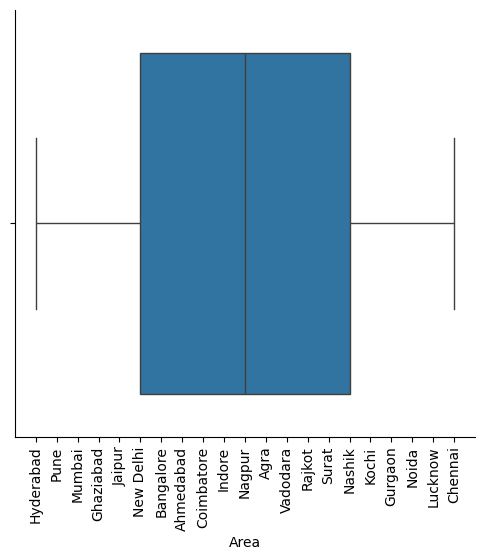

In [190]:
# Univariate-Analysis
# Analysis on area and brandwise, so checking outliers for area and brand 
sns.catplot(data=test,x='Area',kind='box') 
plt.xticks(rotation=90)
plt.show()

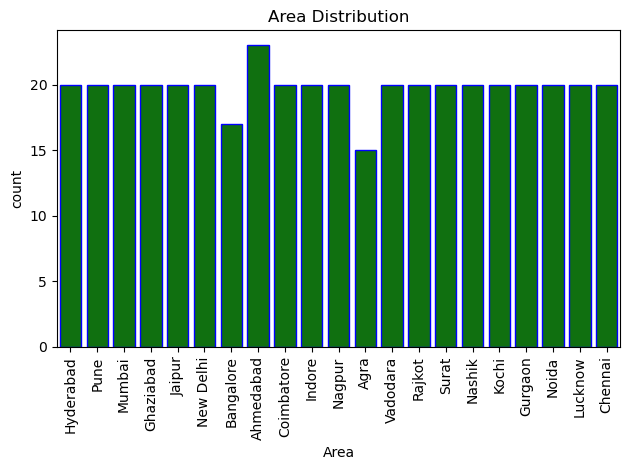

In [192]:
#categorical univariate analysis - frequency count using count plot

sns.countplot(data=test, x='Area',color='Green',edgecolor='Blue')
plt.xticks(rotation=90)  
plt.title('Area Distribution')
plt.tight_layout()
plt.show()

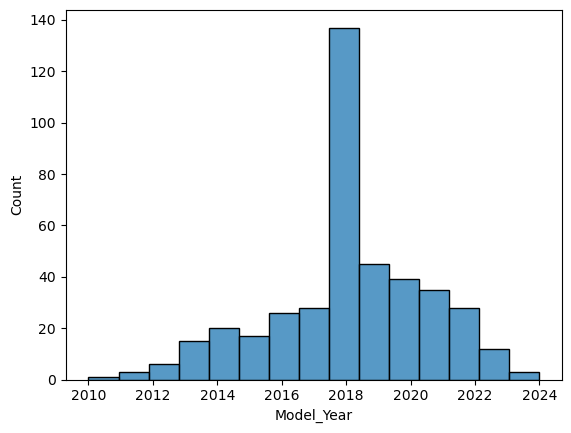

In [194]:
#univariate numerical analysis
sns.histplot(data=test,x='Model_Year',bins=15)
plt.show()

In [196]:
#continuous to continuous correlation plot using heatmap
cont_col=[col for col in test if test[col].dtype!='O']

In [198]:
cont_col

['Model_Year', 'EMI', 'Fixed_price', 'Extra_charges']

In [200]:
cormat=test[cont_col].corr()

In [202]:
cormat

Model_Year       EMI  Fixed_price  Extra_charges
Model_Year       1.000000  0.208194     0.513655       0.067454
EMI              0.208194  1.000000     0.710911       0.217112
Fixed_price      0.513655  0.710911     1.000000       0.262133
Extra_charges    0.067454  0.217112     0.262133       1.000000

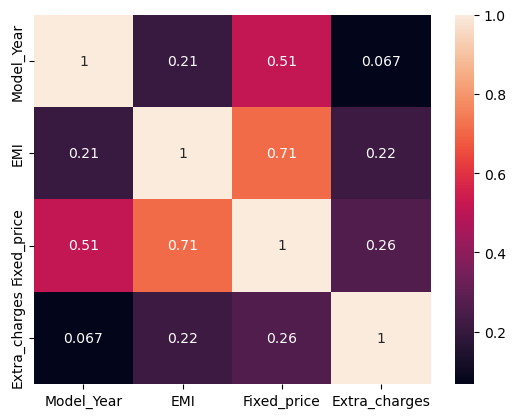

In [204]:
sns.heatmap(cormat,annot=True)
plt.show()

In [206]:
test

Brand                                          Car_Brand  \
0          Tata                      Tata NEXON XZ PLUS (O) PETROL   
1          Tata                       Tata Harrier XT 2.0L KRYOTEC   
2       Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
3       Hyundai            Hyundai Grand i10 SPORTZ 1.2 KAPPA VTVT   
4       Hyundai              Hyundai Grand i10 ASTA 1.2 KAPPA VTVT   
5       Hyundai        Hyundai Grand i10 SPORTZ (O) 1.2 KAPPA VTVT   
6       Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
7       Renault                   Renault Kwid CLIMBER 1.0 AMT (O)   
8        Maruti                               Maruti Swift VXI AMT   
9          Tata                               Tata Tiago XZ PETROL   
10      Renault                       Renault Kwid CLIMBER 1.0 (O)   
11      Renault                           Renault Kwid CLIMBER 1.0   
12      Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
13         Tata                               Tata Tiago XM PETROL   
14        Honda                     Honda Amaze 1.2L I-VTEC VX CVT   
15      Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
16      Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
17   Volkswagen               Volkswagen Polo COMFORTLINE 1.0L MPI   
18         Tata                              Tata ALTROZ XZ PETROL   
19      Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
20      Renault                           Renault Kwid RXT 1.0 AMT   
21      Renault                               Renault Kwid RXT 0.8   
22      Hyundai                             Hyundai i20 SPORTZ 1.2   
23      Hyundai               Hyundai Elite i20 ASTA 1.2 DUAL TONE   
24        Honda                          Honda Amaze 1.2L I-VTEC S   
25       Maruti                             Maruti Celerio VXI CNG   
26      Renault                       Renault Kwid RXT 1.0 AMT (O)   
27      Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
28         Tata                           Tata TIGOR XZ (O) PETROL   
29      Hyundai                       Hyundai NEW SANTRO SPORTZ MT   
30      Hyundai                  Hyundai Verna FLUIDIC 1.6 VTVT SX   
31      Renault                       Renault Kwid RXT 1.0 AMT (O)   
32       Maruti                             Maruti IGNIS SIGMA 1.2   
33      Renault                    Renault Kwid NEOTECH RXL 1.0 MT   
34      Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
35      Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
36     Mahindra                  Mahindra Thar LX PETROL HT 4WD AT   
37      Hyundai                     Hyundai Verna 1.6 VTVT SX + AT   
38       Maruti                                Maruti S PRESSO VXI   
39       Maruti                         Maruti Wagon R 1.0 LXI CNG   
40      Hyundai                         Hyundai i20 MAGNA 1.4 CRDI   
41      Hyundai               Hyundai Verna FLUIDIC 1.6 VTVT SX AT   
42      Hyundai                Hyundai VENUE SX PLUS 1.0 TURBO DCT   
43        Honda                         Honda Amaze 1.2L I-VTEC VX   
44        Honda                      Honda City 1.5L I-VTEC SV CVT   
45      Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
46       Maruti                 Maruti Baleno DELTA CVT PETROL 1.2   
47        Honda                      Honda City 1.5L I-VTEC ZX CVT   
48      Hyundai                Hyundai Creta SX PLUS AT 1.6 PETROL   
49      Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
50      Hyundai              Hyundai Grand i10 ASTA 1.2 KAPPA VTVT   
51       Maruti                                Maruti Alto 800 LXI   
52      Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
53      Renault                           Renault Kwid RXT 1.0 (O)   
54      Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
55         Tata                               Tata TIGOR XE PETROL   
56      Hyundai     

In [208]:
#Cross tab used to see rxn amon categorical variables,provides counts,proportions,totals for combinations, then customize with normalize and margins
#cross tab helps to know whether customers purchased or not
cat_val=pd.crosstab(test['Car_Brand'],test['Area'])
cat_val

Area                                              Agra  Ahmedabad  Bangalore  \
Car_Brand                                                                      
Chevrolet Spark LS 1.0                               0          0          0   
Datsun Go REMIX EDITION                              0          0          0   
Datsun Go T                                          0          0          0   
Datsun Redi Go A                                     0          0          0   
Datsun Redi Go S                                     0          0          0   
Datsun Redi Go T(O) 1.0                              0          0          0   
Datsun Redi Go T(O) 1.0 AMT                          0          0          0   
Ford Ecosport AMBIENTE 1.5L DIESEL                   0          0          0   
Ford Ecosport TITANIUM + 1.5L DIESEL                 1          0          0   
Ford Ecosport TITANIUM 1.5L DIESEL                   0          0          0   
Ford Ecosport TITANIUM 1.5L PETROL                   0          0          0   
Ford Endeavour SPORT 2.0 4X4 AT                      0          0          0   
Ford FREESTYLE TREND PLUS 1.2 PETROL                 0          0          0   
Honda Amaze 1.2L I-VTEC E                            0          0          0   
Honda Amaze 1.2L I-VTEC S                            0          0          0   
Honda Amaze 1.2L I-VTEC S CVT                        0          0          0   
Honda Amaze 1.2L I-VTEC VX                           0          0          0   
Honda Amaze 1.2L I-VTEC VX CVT                       0          0          0   
Honda Brio S MT                                      0          0          0   
Honda City 1.5L I-DTEC V                             1          0          0   
Honda City 1.5L I-VTE V CVT                          0          0          0   
Honda City 1.5L I-VTEC SV                            0          0          0   
Honda City 1.5L I-VTEC SV CVT                        0          0          0   
Honda City 1.5L I-VTEC V MT                          0          0          0   
Honda City 1.5L I-VTEC V MT 5TH GEN                  0          1          0   
Honda City 1.5L I-VTEC VX                            0          0          0   
Honda City 1.5L I-VTEC ZX                            0          0          0   
Honda City 1.5L I-VTEC ZX CVT                        0          0          0   
Honda Jazz 1.2L I-VTEC S AT                          1          0          0   
Honda Jazz 1.2L I-VTEC V                             0          1          0   
Honda Jazz 1.2L I-VTEC V AT                          0          0          0   
Honda WR-V 1.2L I-VTEC S MT                          0          0          0   
Honda WR-V 1.5L I-DTEC VX MT                         0          0          0   
Hyundai AURA SX 1.2 (O)                              0          0          0   
Hyundai Creta E PLUS 1.6 PETROL                      0          0          0   
Hyundai Creta SX PLUS 1.6 PETROL                     0          0          0   
Hyundai Creta SX PLUS AT 1.6 PETROL                  0          0          0   
Hyundai EXTER SX(O) CONNECT 1.2 AMT                  1          0          0   
Hyundai Elite i20 ASTA 1.2 (O)                       0          0          0   
Hyundai Elite i20 ASTA 1.2 DUAL TONE                 0          0          0   
Hyundai Elite i20 ERA 1.2                            0          0          0   
Hyundai Elite i20 MAGNA 1.2                          0          0          0   
Hyundai Elite i20 SPORTZ 1.2                         0          0          0   
Hyundai Elite i20 SPORTZ PLUS 1.2                    3          7          3   
Hyundai Elite i20 SPORTZ PLUS 1.4 CRDI               0          0          0   
Hyundai Eon ERA +                                    0          1          0   
Hyundai Eon MAGNA +                                  0          0          0   
Hyundai GRAND I10 NIOS MAGNA 1.2 KAPPA VTVT          0          0          1   


In [210]:
cat_val2=pd.crosstab(test['Car_Brand'],test['Fuel'])
cat_val2

Fuel                                              CNG  Diesel  Hybrid  Petrol
Car_Brand                                                                    
Chevrolet Spark LS 1.0                              0       0       0       1
Datsun Go REMIX EDITION                             0       0       0       1
Datsun Go T                                         0       0       0       1
Datsun Redi Go A                                    0       0       0       1
Datsun Redi Go S                                    0       0       0       1
Datsun Redi Go T(O) 1.0                             0       0       0       1
Datsun Redi Go T(O) 1.0 AMT                         0       0       0       1
Ford Ecosport AMBIENTE 1.5L DIESEL                  0       1       0       0
Ford Ecosport TITANIUM + 1.5L DIESEL                0       1       0       0
Ford Ecosport TITANIUM 1.5L DIESEL                  0       2       0       0
Ford Ecosport TITANIUM 1.5L PETROL                  0       0       0       3
Ford Endeavour SPORT 2.0 4X4 AT                     1       0       0       0
Ford FREESTYLE TREND PLUS 1.2 PETROL                0       0       0       1
Honda Amaze 1.2L I-VTEC E                           0       0       0       1
Honda Amaze 1.2L I-VTEC S                           1       0       0       3
Honda Amaze 1.2L I-VTEC S CVT                       0       0       0       1
Honda Amaze 1.2L I-VTEC VX                          1       0       0       2
Honda Amaze 1.2L I-VTEC VX CVT                      0       0       0       1
Honda Brio S MT                                     0       0       0       1
Honda City 1.5L I-DTEC V                            0       1       0       0
Honda City 1.5L I-VTE V CVT                         0       0       0       1
Honda City 1.5L I-VTEC SV                           0       0       0       1
Honda City 1.5L I-VTEC SV CVT                       0       0       0       2
Honda City 1.5L I-VTEC V MT                         0       0       0       2
Honda City 1.5L I-VTEC V MT 5TH GEN                 0       0       0       1
Honda City 1.5L I-VTEC VX                           0       0       0       1
Honda City 1.5L I-VTEC ZX                           0       0       0       1
Honda City 1.5L I-VTEC ZX CVT                       0       0       0       1
Honda Jazz 1.2L I-VTEC S AT                         0       0       0       1
Honda Jazz 1.2L I-VTEC V                            0       0       0       1
Honda Jazz 1.2L I-VTEC V AT                         0       0       0       1
Honda WR-V 1.2L I-VTEC S MT                         0       0       0       1
Honda WR-V 1.5L I-DTEC VX MT                        0       1       0       0
Hyundai AURA SX 1.2 (O)                             0       0       0       1
Hyundai Creta E PLUS 1.6 PETROL                     0       0       0       2
Hyundai Creta SX PLUS 1.6 PETROL                    0       0       0       2
Hyundai Creta SX PLUS AT 1.6 PETROL                 0       0       0       1
Hyundai EXTER SX(O) CONNECT 1.2 AMT                 0       0       0       1
Hyundai Elite i20 ASTA 1.2 (O)                      0       0       0       2
Hyundai Elite i20 ASTA 1.2 DUAL TONE                0       0       0       1
Hyundai Elite i20 ERA 1.2                           0       0       0       1
Hyundai Elite i20 MAGNA 1.2                         0       0       0       1
Hyundai Elite i20 SPORTZ 1.2                        0       0       0       2
Hyundai Elite i20 SPORTZ PLUS 1.2                   8      16       1      87
Hyundai Elite i20 SPORTZ PLUS 1.4 CRDI              0       1       0       0
Hyundai Eon ERA +                                   0       0       0       2
Hyundai Eon MAGNA +                                 0       0       0       1
Hyundai GRAND I10 NIOS MAGNA 1.2 KAPPA VTVT         0       0       0       1
Hyundai GRAND I10 NIOS SPORTZ 1.2 KAPPA VTVT        0       0       0       2
Hyundai GRAND I10 NIOS

In [212]:
crosstab_multi_col = pd.crosstab([test['Car_Brand'], test['Area']], [test['Fuel'], test['Transmission']])
print(crosstab_multi_col)

Fuel                                                              CNG         \
Transmission                                                Automatic Manual   
Car_Brand                                        Area                          
Chevrolet Spark LS 1.0                           Nashik             0      0   
Datsun Go REMIX EDITION                          Ghaziabad          0      0   
Datsun Go T                                      Kochi              0      0   
Datsun Redi Go A                                 Indore             0      0   
Datsun Redi Go S                                 Nagpur             0      0   
Datsun Redi Go T(O) 1.0                          Coimbatore         0      0   
Datsun Redi Go T(O) 1.0 AMT                      Jaipur             0      0   
Ford Ecosport AMBIENTE 1.5L DIESEL               Indore             0      0   
Ford Ecosport TITANIUM + 1.5L DIESEL             Agra               0      0   
Ford Ecosport TITANIUM 1.5L DIESEL      

# Categorical-Continuous Bi/Multivariate Brand and Area wise Analysis :

In [215]:
test.groupby(by=['Area'])['Fixed_price'].mean() #in lakhs

Area
Agra          5.779732
Ahmedabad     4.949302
Bangalore     5.536234
Chennai       5.204198
Coimbatore    5.983598
Ghaziabad     4.896098
Gurgaon       5.626797
Hyderabad     5.326498
Indore        5.346998
Jaipur        4.705299
Kochi         3.776899
Lucknow       5.686598
Mumbai        4.792998
Nagpur        4.432598
Nashik        5.611698
New Delhi     5.914598
Noida         5.595399
Pune          4.761799
Rajkot        5.568299
Surat         5.028098
Vadodara      5.158098
Name: Fixed_price, dtype: float64

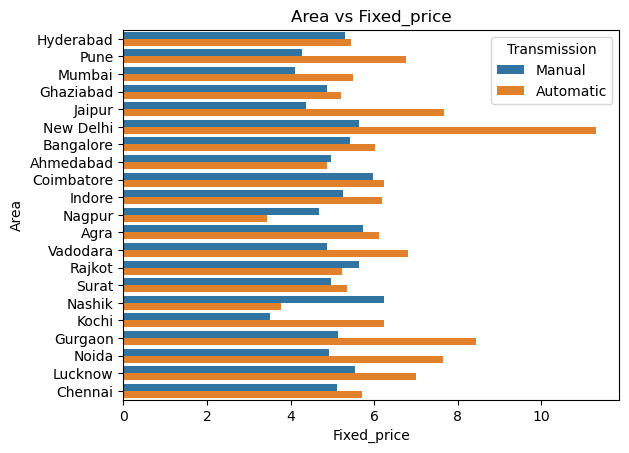

In [217]:
sns.barplot(x=test['Fixed_price'],y=test['Area'],hue=test['Transmission'],errorbar=None)
plt.title('Area vs Fixed_price')
plt.show()

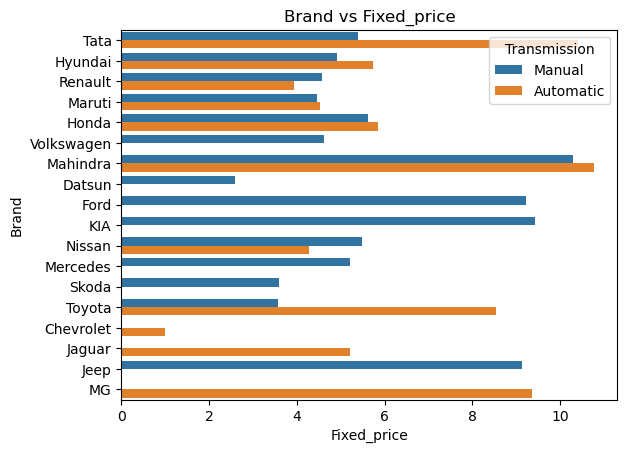

In [219]:
test['Brand'] = test['Car_Brand'].apply(lambda x: x.split()[0])
sns.barplot(x=test['Fixed_price'],y=test['Brand'],hue=test['Transmission'],errorbar=None)
plt.title('Brand vs Fixed_price')
plt.show()

In [221]:
# Brand vs EMI on avg
a=test.groupby(by=['Car_Brand'])['EMI'].mean()
a

Car_Brand
Chevrolet Spark LS 1.0                              11231.128289
Datsun Go REMIX EDITION                              4633.000000
Datsun Go T                                          3695.000000
Datsun Redi Go A                                     5670.000000
Datsun Redi Go S                                     4321.000000
Datsun Redi Go T(O) 1.0                              6061.000000
Datsun Redi Go T(O) 1.0 AMT                          5963.000000
Ford Ecosport AMBIENTE 1.5L DIESEL                  11496.000000
Ford Ecosport TITANIUM + 1.5L DIESEL                15621.000000
Ford Ecosport TITANIUM 1.5L DIESEL                  12756.500000
Ford Ecosport TITANIUM 1.5L PETROL                  10910.666667
Ford Endeavour SPORT 2.0 4X4 AT                     65687.000000
Ford FREESTYLE TREND PLUS 1.2 PETROL                 9384.000000
Honda Amaze 1.2L I-VTEC E                           11342.000000
Honda Amaze 1.2L I-VTEC S                            9685.750000
Honda Amaze 1.2

In [223]:
print(a.min(),a.max())

3695.0 75946.0


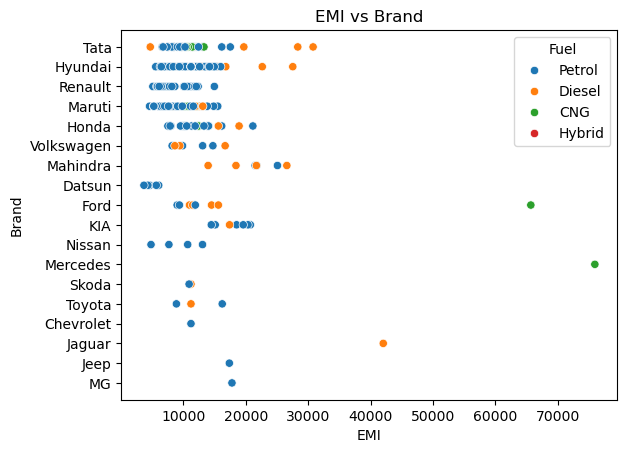

In [225]:
#To avoid clumsiness of brand names,splitting the brand name of car
test['Brand'] = test['Car_Brand'].apply(lambda x: x.split()[0])  # Keep only the first word (brand)
sns.scatterplot(x='EMI', y='Brand', data=test,color='Red',hue=test['Fuel'])
plt.title("EMI vs Brand")
plt.show()

In [227]:
#Area vs EMI
a_e=test.groupby(by=['Area'])['EMI'].mean()
a_e

Area
Agra          11444.758991
Ahmedabad     10661.647740
Bangalore     11054.963816
Chennai       10834.494901
Coimbatore    12021.888487
Ghaziabad     10248.038487
Gurgaon       11765.251316
Hyderabad     10873.582072
Indore        10994.632072
Jaipur        10324.069243
Kochi          8332.575658
Lucknow       11537.088487
Mumbai        10604.082072
Nagpur         9330.488487
Nashik        20161.007730
New Delhi     11818.738487
Noida         11759.225658
Pune          10094.069243
Rajkot        11169.069243
Surat         10448.188487
Vadodara      10488.238487
Name: EMI, dtype: float64

In [229]:
print(round(a_e.min()),round(a_e.max()))

8333 20161


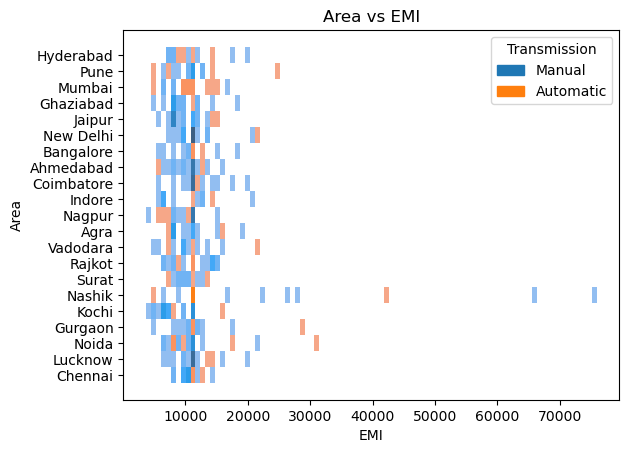

In [231]:
sns.histplot(x='EMI', y='Area', data=test,color='Green',hue=test['Transmission'])
plt.title("Area vs EMI")
plt.show()

In [ ]:
Interpretation :

-Nashik has highest EMI monthly and its for Manual Transmission
-Mumbai has highest number of Automatic car preferences on comparing with EMI cost

In [233]:
#area having maximum km
a_k=test.groupby(by=['Area'])['Km_driven'].max()
a_k

Area
Agra          97688
Ahmedabad     97974
Bangalore     90250
Chennai       93319
Coimbatore    78013
Ghaziabad     99176
Gurgaon       98757
Hyderabad     98933
Indore        83254
Jaipur        97974
Kochi         99223
Lucknow       80373
Mumbai         9366
Nagpur        87275
Nashik        92163
New Delhi     96213
Noida         98131
Pune          99385
Rajkot        93033
Surat         97166
Vadodara      95145
Name: Km_driven, dtype: object

In [235]:
#Brand having maximum km
b_k=test.groupby(by=['Car_Brand'])['Km_driven'].max()
b_k

Car_Brand
Chevrolet Spark LS 1.0                               90126
Datsun Go REMIX EDITION                              99176
Datsun Go T                                          85967
Datsun Redi Go A                                     83254
Datsun Redi Go S                                     39579
Datsun Redi Go T(O) 1.0                              42456
Datsun Redi Go T(O) 1.0 AMT                          23600
Ford Ecosport AMBIENTE 1.5L DIESEL                   66277
Ford Ecosport TITANIUM + 1.5L DIESEL                 49730
Ford Ecosport TITANIUM 1.5L DIESEL                   78013
Ford Ecosport TITANIUM 1.5L PETROL                   66435
Ford Endeavour SPORT 2.0 4X4 AT                      24422
Ford FREESTYLE TREND PLUS 1.2 PETROL                 56518
Honda Amaze 1.2L I-VTEC E                            22842
Honda Amaze 1.2L I-VTEC S                            99385
Honda Amaze 1.2L I-VTEC S CVT                        52176
Honda Amaze 1.2L I-VTEC VX                    

In [237]:
#Area having avg fixed_price and extra_charges
b_k=test.groupby(by=['Area'])[['Fixed_price','Extra_charges']].mean()
b_k

Fixed_price  Extra_charges
Area                                  
Agra           5.779732    5848.266667
Ahmedabad      4.949302   10589.869565
Bangalore      5.536234    6358.470588
Chennai        5.204198    7542.500000
Coimbatore     5.983598    6335.050000
Ghaziabad      4.896098    7006.950000
Gurgaon        5.626797    8126.950000
Hyderabad      5.326498    8181.150000
Indore         5.346998   18407.350000
Jaipur         4.705299   22889.100000
Kochi          3.776899    5265.500000
Lucknow        5.686598    7077.250000
Mumbai         4.792998    7254.750000
Nagpur         4.432598    6631.700000
Nashik         5.611698    9463.589873
New Delhi      5.914598    8657.750000
Noida          5.595399    8454.800000
Pune           4.761799    7987.300000
Rajkot         5.568299   11208.100000
Surat          5.028098   12598.500000
Vadodara       5.158098   11311.950000

In [239]:
l=pd.set_option('display.max_rows', None)

In [241]:
c_k=test.groupby(by=['Area','Car_Brand'])[['Fixed_price','Extra_charges']].mean()
c_k

Fixed_price  \
Area       Car_Brand                                                       
Agra       Ford Ecosport TITANIUM + 1.5L DIESEL                 7.990000   
           Honda City 1.5L I-DTEC V                             9.950000   
           Honda Jazz 1.2L I-VTEC S AT                          3.850000   
           Hyundai EXTER SX(O) CONNECT 1.2 AMT                  8.400000   
           Hyundai Elite i20 SPORTZ PLUS 1.2                    5.211993   
           Hyundai Xcent S 1.2                                  4.780000   
           Maruti Alto LXI OPT CNG                              4.260000   
           Maruti Baleno DELTA DIESEL 1.3                       4.300000   
           Maruti Baleno ZETA PETROL 1.2                        5.990000   
           Maruti Ciaz ALPHA 1.5 SHVS PETROL                    7.600000   
           Maruti Swift Dzire VXI                               4.250000   
           Renault TRIBER RXL MT                                5.490000   
           Volkswagen Polo HIGHLINE PLUS 1.0 16 ALLOY           4.200000   
Ahmedabad  Honda City 1.5L I-VTEC V MT 5TH GEN                  8.490000   
           Honda Jazz 1.2L I-VTEC V                             5.000000   
           Hyundai Elite i20 SPORTZ PLUS 1.2                    5.211993   
           Hyundai Eon ERA +                                    1.900000   
           Hyundai VENUE S 1.2                                  6.170000   
           Hyundai Verna 1.6 CRDI SX                            5.750000   
           Hyundai i20 SPORTZ 1.2                               2.890000   
           Maruti Alto K10 VXI AMT                              3.070000   
           Maruti IGNIS SIGMA 1.2                               3.980000   
           Maruti New Wagon-R VXI 1.0                           3.960000   
           Maruti S PRESSO VXI+                                 3.590000   
           Maruti Swift LXI                                     3.450000   
           Maruti Swift ZDI                                     3.950000   
           Maruti Vitara Brezza VXI AT SHVS                     6.680000   
           Tata ALTROZ XZ PETROL                                5.300000   
           Tata NEXON XZ PLUS PETROL                            6.360000   
           Tata TIGOR XZ PLUS CNG                               6.810000   
Bangalore  Hyundai Elite i20 SPORTZ PLUS 1.2                    5.211993   
           Hyundai GRAND I10 NIOS MAGNA 1.2 KAPPA VTVT          6.400000   
           KIA SONET HTX 1.0 IMT                                9.740000   
           Maruti Alto 800 VXI O                                3.160000   
           Maruti Celerio ZXI                                   4.940000   
           Maruti Ertiga VXI                                    7.870000   
           Maruti Swift Dzire ZXI                               4.880000   
           Maruti Swift ZXI PLUS                                5.860000   
           Renault Kwid RXT 1.0                                 2.940000   
           Renault Kwid RXT 1.0 (O)                             3.980000   
           Renault TRIBER RXL MT                                5.150000   
           Renault TRIBER RXZ AMT                               5.730000   
           Tata ALTROZ XZ PETROL                                6.680000   
           Tata TIGOR XM PETROL                                 5.200000   
           Tata TIGOR XZA PLUS PETROL                           5.950000   
Chennai    Ford FREESTYLE TREND PLUS 1.2 PETROL                 4.800000   
           Honda City 1.5L I-VTEC SV                            4.740000   
           Hyundai Creta E PLUS 1.6 PETROL                      7.270000   
           Hyundai Elite i20 SPORTZ 1.2                         4.790000   
           Hyundai Elite i20 SPORTZ PLUS 1.2                    5.211993   
           Hyundai Grand i10 ASTA 1.2 KAPPA VTVT                3.780000   
           Hyundai Verna 1.6 VTVT

In [243]:
pivot_multi = pd.pivot_table(test, index='Engine_capacity', columns='Area', aggfunc='size',fill_value=0)
print(pivot_multi)

Area             Agra  Ahmedabad  Bangalore  Chennai  Coimbatore  Ghaziabad  \
Engine_capacity                                                               
1086                0          0          0        2           1          0   
1120                0          0          0        0           0          0   
1194                0          0          0        1           0          0   
1197                5          5          2        7           4         10   
1198                0          2          0        1           0          3   
1199                2          4          3        2           3          1   
1248                1          1          0        0           0          0   
1368                0          0          0        0           0          0   
1373                0          0          1        0           0          1   
1396                0          0          0        0           0          0   
1451                0          0          0        0

# Overall India Analysis :

In [248]:
# overall India Analysis
area_wise_analysis = test.groupby('Area').agg({
    'Fixed_price': 'sum',  
    'Extra_charges': 'sum'  
}).reset_index()


india_overall = test[['Fixed_price', 'Extra_charges']].sum()
print("Area-Wise Analysis:")
print(area_wise_analysis)

# Print the overall statistics for India
print("\nOverall Statistics for India:")
print(india_overall)

Area-Wise Analysis:
          Area  Fixed_price  Extra_charges
0         Agra    86.695980   87724.000000
1    Ahmedabad   113.833954  243567.000000
2    Bangalore    94.115980  108094.000000
3      Chennai   104.083954  150850.000000
4   Coimbatore   119.671961  126701.000000
5    Ghaziabad    97.921961  140139.000000
6      Gurgaon   112.535948  162539.000000
7    Hyderabad   106.529967  163623.000000
8       Indore   106.939967  368147.000000
9       Jaipur    94.105980  457782.000000
10       Kochi    75.537974  105310.000000
11     Lucknow   113.731961  141545.000000
12      Mumbai    95.859967  145095.000000
13      Nagpur    88.651961  132634.000000
14      Nashik   112.233954  189271.797468
15   New Delhi   118.291961  173155.000000
16       Noida   111.907974  169096.000000
17        Pune    95.235980  159746.000000
18      Rajkot   111.365980  224162.000000
19       Surat   100.561961  251970.000000
20    Vadodara   103.161961  226239.000000

Overall Statistics for India:
Fix

In [250]:
area_wise_analysis = test.groupby('Area').agg({
    'Fixed_price': 'mean',  
    'Extra_charges': 'mean'  
}).reset_index()


india_overall = test[['Fixed_price', 'Extra_charges']].mean()
print("Area-Wise Analysis:")
print(area_wise_analysis)

# Print the overall statistics for India
print("\nOverall Statistics for India:")
print(india_overall)

Area-Wise Analysis:
          Area  Fixed_price  Extra_charges
0         Agra     5.779732    5848.266667
1    Ahmedabad     4.949302   10589.869565
2    Bangalore     5.536234    6358.470588
3      Chennai     5.204198    7542.500000
4   Coimbatore     5.983598    6335.050000
5    Ghaziabad     4.896098    7006.950000
6      Gurgaon     5.626797    8126.950000
7    Hyderabad     5.326498    8181.150000
8       Indore     5.346998   18407.350000
9       Jaipur     4.705299   22889.100000
10       Kochi     3.776899    5265.500000
11     Lucknow     5.686598    7077.250000
12      Mumbai     4.792998    7254.750000
13      Nagpur     4.432598    6631.700000
14      Nashik     5.611698    9463.589873
15   New Delhi     5.914598    8657.750000
16       Noida     5.595399    8454.800000
17        Pune     4.761799    7987.300000
18      Rajkot     5.568299   11208.100000
19       Surat     5.028098   12598.500000
20    Vadodara     5.158098   11311.950000

Overall Statistics for India:
Fix

In [252]:
area_wise_analysis = test.groupby(['Area','Car_Brand']).agg({
    'Fixed_price': 'mean',  
    'Extra_charges': 'mean'  
}).reset_index()


india_overall = test[['Fixed_price', 'Extra_charges']].mean()


# Print the overall statistics for India
print("\nOverall Statistics for India:")
print(india_overall)


Overall Statistics for India:
Fixed_price         5.211993
Extra_charges    9463.589873
dtype: float64


In [254]:
test.drop(columns=['Brand'],inplace=True)

In [258]:
c = test['Car_Brand'].apply(lambda x: x.split()[0])
test.insert(0,'Brand',c)

In [260]:
test

Brand                                          Car_Brand  \
0          Tata                      Tata NEXON XZ PLUS (O) PETROL   
1          Tata                       Tata Harrier XT 2.0L KRYOTEC   
2       Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
3       Hyundai            Hyundai Grand i10 SPORTZ 1.2 KAPPA VTVT   
4       Hyundai              Hyundai Grand i10 ASTA 1.2 KAPPA VTVT   
5       Hyundai        Hyundai Grand i10 SPORTZ (O) 1.2 KAPPA VTVT   
6       Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
7       Renault                   Renault Kwid CLIMBER 1.0 AMT (O)   
8        Maruti                               Maruti Swift VXI AMT   
9          Tata                               Tata Tiago XZ PETROL   
10      Renault                       Renault Kwid CLIMBER 1.0 (O)   
11      Renault                           Renault Kwid CLIMBER 1.0   
12      Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
13         Tata                               Tata Tiago XM PETROL   
14        Honda                     Honda Amaze 1.2L I-VTEC VX CVT   
15      Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
16      Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
17   Volkswagen               Volkswagen Polo COMFORTLINE 1.0L MPI   
18         Tata                              Tata ALTROZ XZ PETROL   
19      Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
20      Renault                           Renault Kwid RXT 1.0 AMT   
21      Renault                               Renault Kwid RXT 0.8   
22      Hyundai                             Hyundai i20 SPORTZ 1.2   
23      Hyundai               Hyundai Elite i20 ASTA 1.2 DUAL TONE   
24        Honda                          Honda Amaze 1.2L I-VTEC S   
25       Maruti                             Maruti Celerio VXI CNG   
26      Renault                       Renault Kwid RXT 1.0 AMT (O)   
27      Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
28         Tata                           Tata TIGOR XZ (O) PETROL   
29      Hyundai                       Hyundai NEW SANTRO SPORTZ MT   
30      Hyundai                  Hyundai Verna FLUIDIC 1.6 VTVT SX   
31      Renault                       Renault Kwid RXT 1.0 AMT (O)   
32       Maruti                             Maruti IGNIS SIGMA 1.2   
33      Renault                    Renault Kwid NEOTECH RXL 1.0 MT   
34      Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
35      Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
36     Mahindra                  Mahindra Thar LX PETROL HT 4WD AT   
37      Hyundai                     Hyundai Verna 1.6 VTVT SX + AT   
38       Maruti                                Maruti S PRESSO VXI   
39       Maruti                         Maruti Wagon R 1.0 LXI CNG   
40      Hyundai                         Hyundai i20 MAGNA 1.4 CRDI   
41      Hyundai               Hyundai Verna FLUIDIC 1.6 VTVT SX AT   
42      Hyundai                Hyundai VENUE SX PLUS 1.0 TURBO DCT   
43        Honda                         Honda Amaze 1.2L I-VTEC VX   
44        Honda                      Honda City 1.5L I-VTEC SV CVT   
45      Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
46       Maruti                 Maruti Baleno DELTA CVT PETROL 1.2   
47        Honda                      Honda City 1.5L I-VTEC ZX CVT   
48      Hyundai                Hyundai Creta SX PLUS AT 1.6 PETROL   
49      Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
50      Hyundai              Hyundai Grand i10 ASTA 1.2 KAPPA VTVT   
51       Maruti                                Maruti Alto 800 LXI   
52      Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
53      Renault                           Renault Kwid RXT 1.0 (O)   
54      Hyundai                  Hyundai Elite i20 SPORTZ PLUS 1.2   
55         Tata                               Tata TIGOR XE PETROL   
56      Hyundai     

In [262]:
test.isnull().sum()

Brand               0
Car_Brand           0
Model_Year          0
Address             0
Area                0
EMI                 0
Fixed_price         0
Extra_charges       0
Registered_Month    0
Register_Year       0
Fuel                0
Km_driven           0
Transmission        0
Engine_capacity     0
dtype: int64